# First machine learning example

In [5]:
%matplotlib inline
# Import libraries (Numpy, Tensorflow, matplotlib)
import numpy as np
import matplotlib.pyplot as plot

In [6]:
# Create 1000 points following a function y=0.1 * x + 0.4 (i.e. y = W * x + b) with some normal random distribution:
num_points = 1000
vectors_set = []
for i in range(num_points):
    W = 0.1  # W
    b = 0.4  # b
    x1 = np.random.normal(0.0, 1.0)
    nd = np.random.normal(0.0, 0.05)
    y1 = W * x1 + b
    # Add some impurity with some normal distribution -i.e. nd:y1 = y1 + nd
    y1 = y1+nd
    # Append them and create a combined vector set:
    vectors_set.append([x1, y1])

In [7]:
# Separate the data point across axises
x_data = [v[0] for v in vectors_set]
y_data = [v[1] for v in vectors_set]

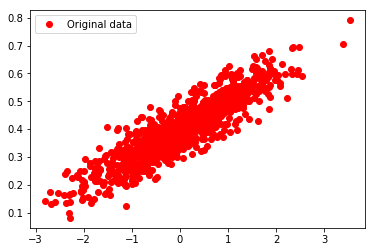

In [8]:
# Plot and show the data points in a 2D space
plot.plot(x_data, y_data, 'ro', label='Original data')
plot.legend()
plot.show()

In [9]:
import tensorflow as tf

#tf.name_scope organize things on the tensorboard graph view
with tf.name_scope("LinearRegression") as scope:
   W = tf.Variable(tf.random_uniform([1], -1.0, 1.0), name="Weights")
   b = tf.Variable(tf.zeros([1]))
   y = W * x_data + b

In [11]:
# Define a loss function that takes into account the distance between the prediction and our dataset
with tf.name_scope("LossFunction") as scope:
   loss = tf.reduce_mean(tf.square(y - y_data))

In [12]:
optimizer = tf.train.GradientDescentOptimizer(0.6)
train = optimizer.minimize(loss)

In [13]:
# Annotate loss, weights, and bias (Needed for tensorboard)
loss_summary = tf.summary.scalar("loss", loss)
w_ = tf.summary.histogram("W", W)
b_ = tf.summary.histogram("b", b)
	
# Merge all the summaries
merged_op = tf.summary.merge_all()

In [14]:
init = tf.global_variables_initializer()
sess = tf.Session()
sess.run(init)

In [15]:
# Writer for TensorBoard  (replace with our preferred location
writer_tensorboard = tf.summary.FileWriter('./LR/', sess.graph)


0 [0.04364884] [0.4743717] 0.011023809


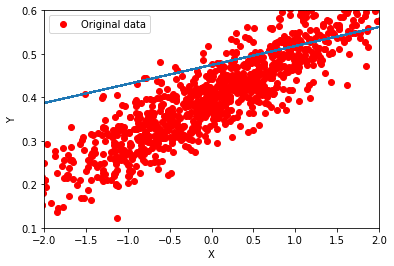

1 [0.10966381] [0.3847714] 0.0026270826


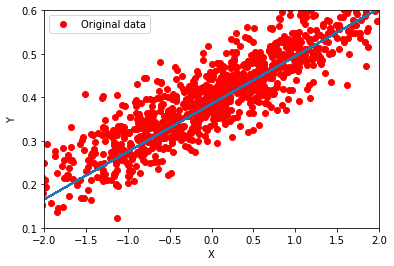

2 [0.09768881] [0.40173104] 0.0023349426


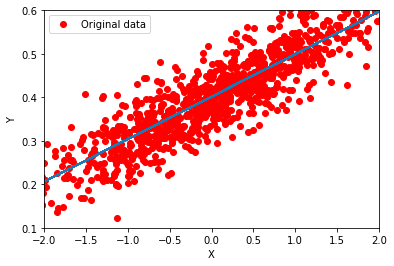

3 [0.09985078] [0.39851335] 0.0023247597


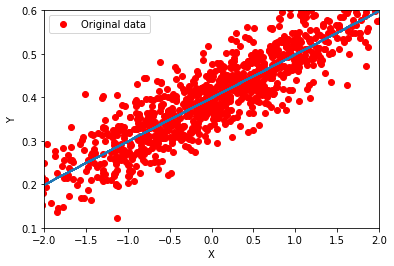

4 [0.09946272] [0.39912543] 0.0023244037


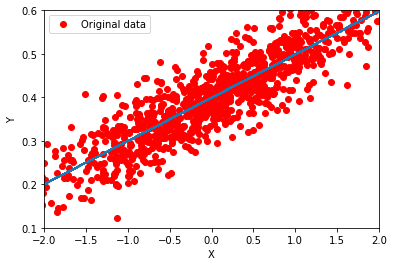

5 [0.09953187] [0.39900866] 0.0023243914


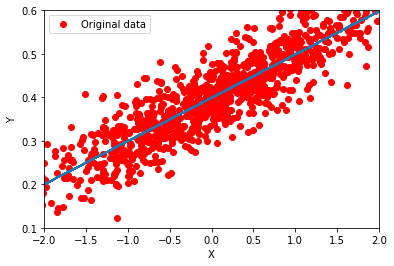

6 [0.09951966] [0.399031] 0.0023243905


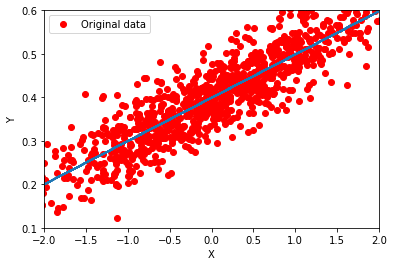

7 [0.09952179] [0.3990267] 0.0023243905


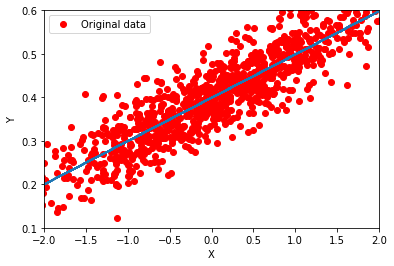

8 [0.09952143] [0.39902753] 0.0023243905


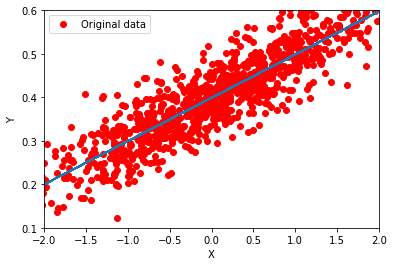

9 [0.09952149] [0.39902738] 0.002324391


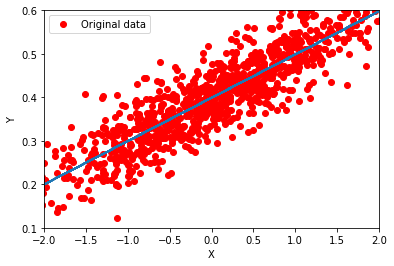

10 [0.09952148] [0.3990274] 0.0023243907


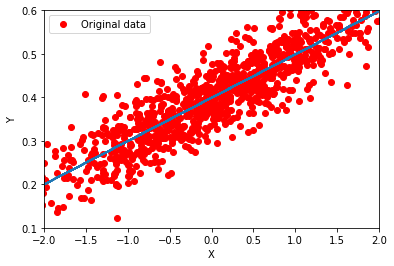

11 [0.09952148] [0.3990274] 0.0023243907


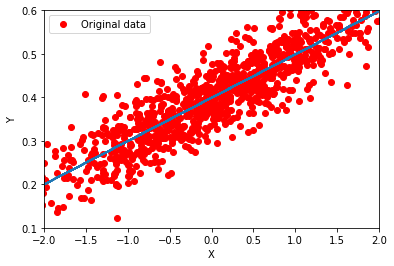

12 [0.09952148] [0.3990274] 0.0023243907


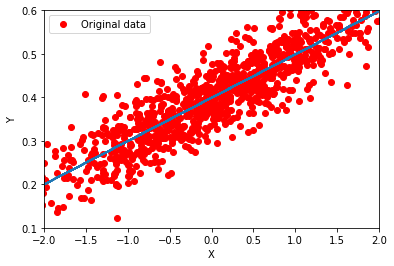

13 [0.09952148] [0.3990274] 0.0023243907


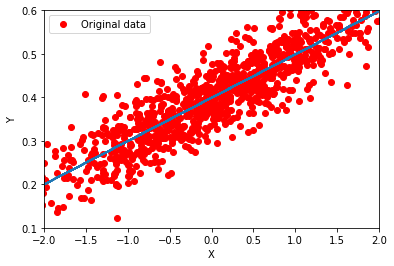

14 [0.09952148] [0.3990274] 0.0023243907


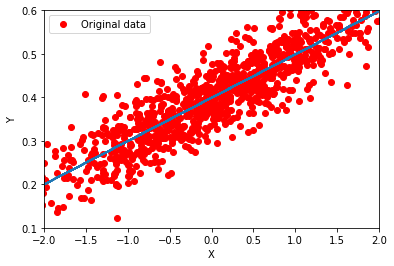

15 [0.09952148] [0.3990274] 0.0023243907


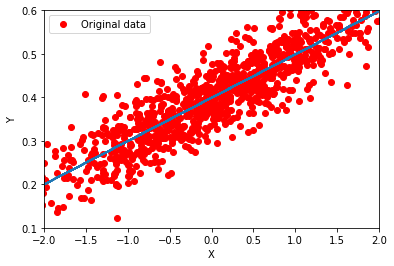

In [16]:
for i in range(16):
   sess.run(train)
   print(i, sess.run(W), sess.run(b), sess.run(loss))
   plot.plot(x_data, y_data, 'ro', label='Original data')
   plot.plot(x_data, sess.run(W)*x_data + sess.run(b))
   plot.xlabel('X')
   plot.xlim(-2, 2)
   plot.ylim(0.1, 0.6)
   plot.ylabel('Y')
   plot.legend()
   plot.show()
# Finally, close the TensorFlow session when you're done
sess.close()